In [1]:
import numpy as np
import pandas as pd

In [32]:
df = pd.read_csv('./dataset/url_spam_classification.csv')

In [33]:
df.sample(5)

,url,is_spam
71797,https://www.newsbling.co/,True
144107,https://www.cnbc.com/2020/12/09/ftc-and-severa...,False
16354,https://www.brainpickings.org/2020/04/10/antid...,True
65627,https://thehustle.co/09162020-/,False
129302,https://www.thelily.com/these-two-friends-live...,False


In [34]:
df.shape

(148303, 2)

In [35]:
# 1. Data cleaning
# 2. EDA
# 3. Text Preprocessing
# 4. Model building
# 5. Evaluation
# 6. Improvement
# 7. Website
# 8. Deploy

## 1. Data Cleaning

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148303 entries, 0 to 148302
Data columns (total 2 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   url      148303 non-null  object
 1   is_spam  148303 non-null  bool  
dtypes: bool(1), object(1)
memory usage: 1.3+ MB


In [37]:
# drop last 3 cols
# df.drop(columns=['Unnamed: 0'],inplace=True)

In [38]:
df.sample(5)

,url,is_spam
76735,https://www.politico.com/news/2020/09/28/donal...,False
98574,http://bermanhornstudio.com/,False
111138,https://www.swiss-miss.com/2020/11/how-to-be-a...,False
66056,https://muckrack.com/edgar-sandoval,False
43090,https://www.newyorker.com/news/campaign-chroni...,False


In [39]:
# renaming the cols
df.rename(columns={'is_spam':'target','url':'url'},inplace=True)
df.insert(0,'target', df.pop('target'))
df.sample(5)


,target,url
38052,False,https://elevator.cmail19.com/t/t-u-pkihdid-vkj...
34955,False,https://inside.com/campaigns/inside-daily-brie...
67146,True,https://muckrack.com/heather-long
135260,False,https://news.uchicago.edu/story/uchicago-study...
21218,False,https://www.nytimes.com/2020/07/29/technology/...


In [40]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [42]:
df['target'] = encoder.fit_transform(df['target'])

In [43]:
df.head()

,target,url
0,1,https://briefingday.us8.list-manage.com/unsubs...
1,1,https://www.hvper.com/
2,1,https://briefingday.com/m/v4n3i4f3
3,0,https://briefingday.com/n/20200618/m#commentform
4,1,https://briefingday.com/fan


In [44]:
# missing values
df.isnull().sum()

target    0
url       0
dtype: int64

In [45]:
# check for duplicate values
df.duplicated().sum()

60722

In [46]:
# remove duplicates
df = df.drop_duplicates(keep='first')

In [47]:
df.duplicated().sum()

0

In [48]:
df.shape

(87581, 2)

## 2.EDA

In [49]:
df.head()

,target,url
0,1,https://briefingday.us8.list-manage.com/unsubs...
1,1,https://www.hvper.com/
2,1,https://briefingday.com/m/v4n3i4f3
3,0,https://briefingday.com/n/20200618/m#commentform
4,1,https://briefingday.com/fan


In [50]:
df['target'].value_counts()

target
0    84796
1     2785
Name: count, dtype: int64

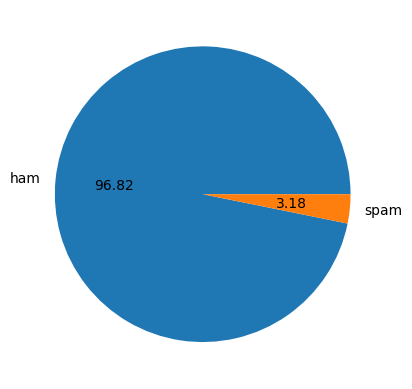

In [51]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(), labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [22]:
# Data is imbalanced

In [23]:
import nltk

In [24]:
!pip install nltk

In [52]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /Users/mac/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [54]:
df['len_url'] = df['url'].apply(lambda x : len(x))
df.head()

,target,url,len_url
0,1,https://briefingday.us8.list-manage.com/unsubs...,51
1,1,https://www.hvper.com/,22
2,1,https://briefingday.com/m/v4n3i4f3,34
3,0,https://briefingday.com/n/20200618/m#commentform,48
4,1,https://briefingday.com/fan,27


In [55]:
df['contains_subscribe'] = df['url'].apply(lambda x : 1 if "subscribe" in x else 0)
df.head()

,target,url,len_url,contains_subscribe
0,1,https://briefingday.us8.list-manage.com/unsubs...,51,1
1,1,https://www.hvper.com/,22,0
2,1,https://briefingday.com/m/v4n3i4f3,34,0
3,0,https://briefingday.com/n/20200618/m#commentform,48,0
4,1,https://briefingday.com/fan,27,0


In [56]:
# check for #
df['contains_hash'] = df['url'].apply(lambda x : 1 if "#" in x else 0)
df.head()

,target,url,len_url,contains_subscribe,contains_hash
0,1,https://briefingday.us8.list-manage.com/unsubs...,51,1,0
1,1,https://www.hvper.com/,22,0,0
2,1,https://briefingday.com/m/v4n3i4f3,34,0,0
3,0,https://briefingday.com/n/20200618/m#commentform,48,0,1
4,1,https://briefingday.com/fan,27,0,0


In [57]:
df['num_digits'] = df['url'].apply(lambda x : len("".join(_ for _ in x if _.isdigit())) )
df.head()

,target,url,len_url,contains_subscribe,contains_hash,num_digits
0,1,https://briefingday.us8.list-manage.com/unsubs...,51,1,0,1
1,1,https://www.hvper.com/,22,0,0,0
2,1,https://briefingday.com/m/v4n3i4f3,34,0,0,4
3,0,https://briefingday.com/n/20200618/m#commentform,48,0,1,8
4,1,https://briefingday.com/fan,27,0,0,0


In [58]:
df['non_https'] = df['url'].apply(lambda x : 1 if "https" in x else 0)
df.head()

,target,url,len_url,contains_subscribe,contains_hash,num_digits,non_https
0,1,https://briefingday.us8.list-manage.com/unsubs...,51,1,0,1,1
1,1,https://www.hvper.com/,22,0,0,0,1
2,1,https://briefingday.com/m/v4n3i4f3,34,0,0,4,1
3,0,https://briefingday.com/n/20200618/m#commentform,48,0,1,8,1
4,1,https://briefingday.com/fan,27,0,0,0,1


In [59]:
df['num_words'] = df['url'].apply(lambda x : len(x.split("/")))
df.head()

,target,url,len_url,contains_subscribe,contains_hash,num_digits,non_https,num_words
0,1,https://briefingday.us8.list-manage.com/unsubs...,51,1,0,1,1,4
1,1,https://www.hvper.com/,22,0,0,0,1,4
2,1,https://briefingday.com/m/v4n3i4f3,34,0,0,4,1,5
3,0,https://briefingday.com/n/20200618/m#commentform,48,0,1,8,1,6
4,1,https://briefingday.com/fan,27,0,0,0,1,4


In [60]:
df['contains_?'] = df['url'].apply(lambda x : 1 if "?" in x else 0)
df.head()

,target,url,len_url,contains_subscribe,contains_hash,num_digits,non_https,num_words,contains_?
0,1,https://briefingday.us8.list-manage.com/unsubs...,51,1,0,1,1,4,0
1,1,https://www.hvper.com/,22,0,0,0,1,4,0
2,1,https://briefingday.com/m/v4n3i4f3,34,0,0,4,1,5,0
3,0,https://briefingday.com/n/20200618/m#commentform,48,0,1,8,1,6,0
4,1,https://briefingday.com/fan,27,0,0,0,1,4,0


In [61]:
df['contains_www'] = df['url'].apply(lambda x : 1 if "www" in x else 0)
df.head()

,target,url,len_url,contains_subscribe,contains_hash,num_digits,non_https,num_words,contains_?,contains_www
0,1,https://briefingday.us8.list-manage.com/unsubs...,51,1,0,1,1,4,0,0
1,1,https://www.hvper.com/,22,0,0,0,1,4,0,1
2,1,https://briefingday.com/m/v4n3i4f3,34,0,0,4,1,5,0,0
3,0,https://briefingday.com/n/20200618/m#commentform,48,0,1,8,1,6,0,0
4,1,https://briefingday.com/fan,27,0,0,0,1,4,0,0


In [62]:
df[['len_url','contains_subscribe','contains_hash', 'num_digits', 'non_https', 'num_words', 'contains_?', 'contains_www']].describe()

,len_url,contains_subscribe,contains_hash,num_digits,non_https,num_words,contains_?,contains_www
count,87581.000000,87581.000000,87581.000000,87581.000000,87581.000000,87581.000000,87581.000000,87581.000000
mean,80.631530,0.004122,0.016054,7.407371,0.984803,6.197120,0.033283,0.570409
std,37.627471,0.064070,0.125683,8.869526,0.122338,1.796736,0.179377,0.495021
min,13.000000,0.000000,0.000000,0.000000,0.000000,4.000000,0.000000,0.000000
25%,52.000000,0.000000,0.000000,0.000000,1.000000,5.000000,0.000000,0.000000
50%,78.000000,0.000000,0.000000,6.000000,1.000000,6.000000,0.000000,1.000000
75%,102.000000,0.000000,0.000000,10.000000,1.000000,8.000000,0.000000,1.000000
max,511.000000,1.000000,1.000000,130.000000,1.000000,18.000000,1.000000,1.000000


In [63]:
# ham
df[df['target'] == 0][['len_url','contains_subscribe','contains_hash', 'num_digits', 'non_https', 'num_words', 'contains_?', 'contains_www']].describe()

,len_url,contains_subscribe,contains_hash,num_digits,non_https,num_words,contains_?,contains_www
count,84796.000000,84796.000000,84796.000000,84796.000000,84796.000000,84796.000000,84796.000000,84796.000000
mean,81.486214,0.000731,0.016416,7.552349,0.985058,6.237370,0.034223,0.578612
std,37.444490,0.027030,0.127069,8.887389,0.121320,1.795015,0.181803,0.493784
min,13.000000,0.000000,0.000000,0.000000,0.000000,4.000000,0.000000,0.000000
25%,53.000000,0.000000,0.000000,0.000000,1.000000,5.000000,0.000000,0.000000
50%,79.000000,0.000000,0.000000,7.000000,1.000000,6.000000,0.000000,1.000000
75%,102.000000,0.000000,0.000000,10.000000,1.000000,8.000000,0.000000,1.000000
max,511.000000,1.000000,1.000000,130.000000,1.000000,18.000000,1.000000,1.000000


In [64]:
#spam
df[df['target'] == 1][['len_url','contains_subscribe','contains_hash', 'num_digits', 'non_https', 'num_words', 'contains_?', 'contains_www']].describe()

,len_url,contains_subscribe,contains_hash,num_digits,non_https,num_words,contains_?,contains_www
count,2785.000000,2785.000000,2785.000000,2785.000000,2785.000000,2785.000000,2785.000000,2785.000000
mean,54.608618,0.107361,0.005027,2.993178,0.977020,4.971634,0.004668,0.320646
std,33.690430,0.309627,0.070735,6.993092,0.149867,1.365992,0.068174,0.466809
min,16.000000,0.000000,0.000000,0.000000,0.000000,4.000000,0.000000,0.000000
25%,33.000000,0.000000,0.000000,0.000000,1.000000,4.000000,0.000000,0.000000
50%,46.000000,0.000000,0.000000,0.000000,1.000000,4.000000,0.000000,0.000000
75%,65.000000,0.000000,0.000000,3.000000,1.000000,5.000000,0.000000,1.000000
max,345.000000,1.000000,1.000000,81.000000,1.000000,13.000000,1.000000,1.000000


In [65]:
import seaborn as sns

<Axes: xlabel='len_url', ylabel='Count'>

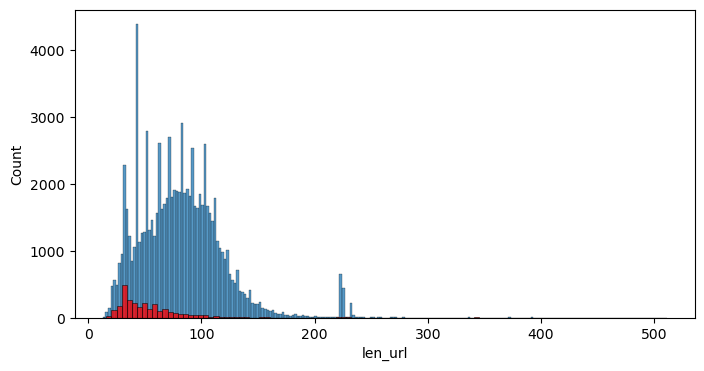

In [66]:
plt.figure(figsize=(8,4))
sns.histplot(df[df['target'] == 0]['len_url'])
sns.histplot(df[df['target'] == 1]['len_url'],color='red')

<Axes: xlabel='num_digits', ylabel='Count'>

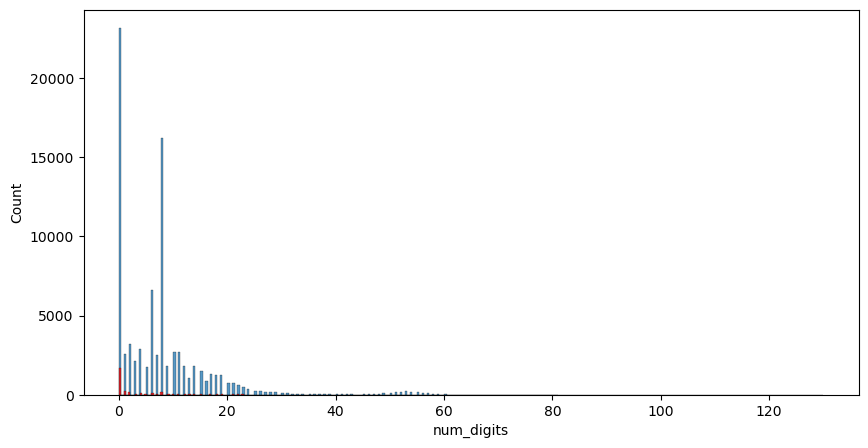

In [68]:
plt.figure(figsize=(10,5))
sns.histplot(df[df['target'] == 0]['num_digits'])
sns.histplot(df[df['target'] == 1]['num_digits'],color='red')

<Axes: xlabel='num_words', ylabel='Count'>

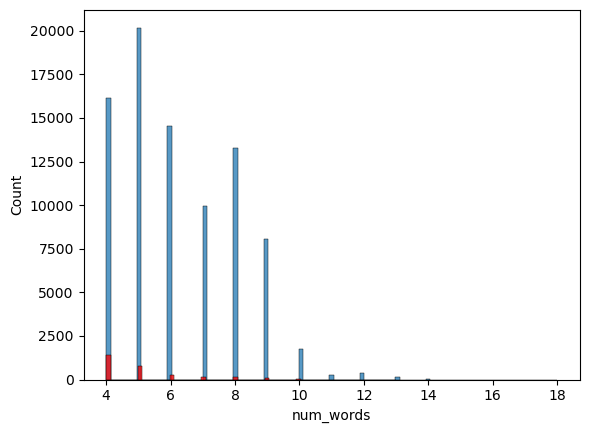

In [70]:
plt.figure()
sns.histplot(df[df['target'] == 0]['num_words'])
sns.histplot(df[df['target'] == 1]['num_words'],color='red')

<Axes: xlabel='contains_subscribe', ylabel='Count'>

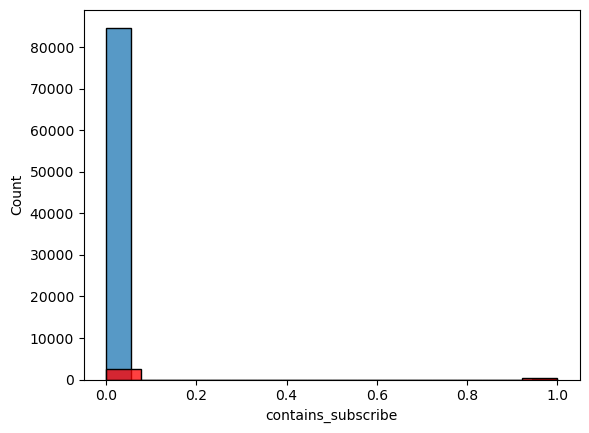

In [77]:
plt.figure()
sns.histplot(df[df['target'] == 0]['contains_subscribe'])
sns.histplot(df[df['target'] == 1]['contains_subscribe'],color='red')

<Axes: xlabel='contains_hash', ylabel='Count'>

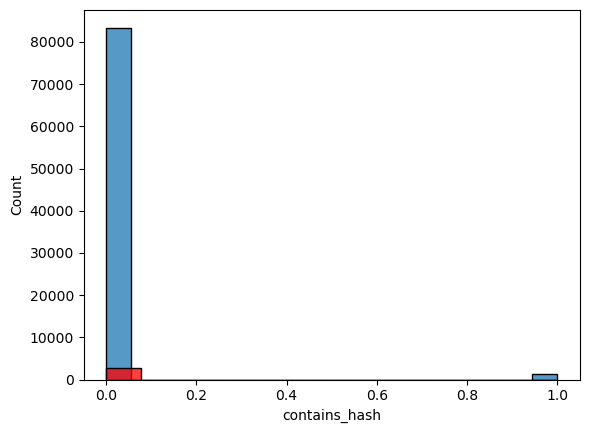

In [78]:
plt.figure()
sns.histplot(df[df['target'] == 0]['contains_hash'])
sns.histplot(df[df['target'] == 1]['contains_hash'],color='red')

<Axes: xlabel='non_https', ylabel='Count'>

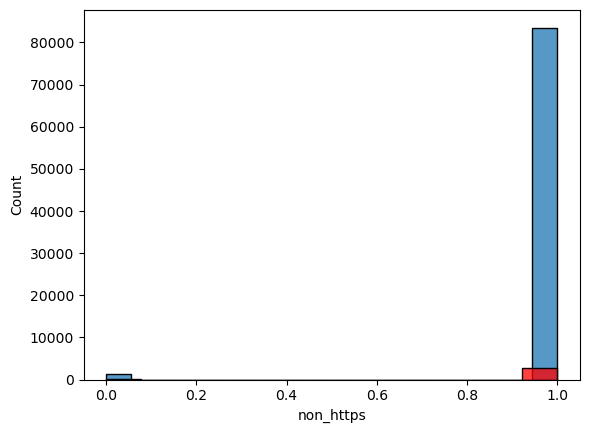

In [79]:
plt.figure()
sns.histplot(df[df['target'] == 0]['non_https'])
sns.histplot(df[df['target'] == 1]['non_https'],color='red')

<Axes: xlabel='contains_?', ylabel='Count'>

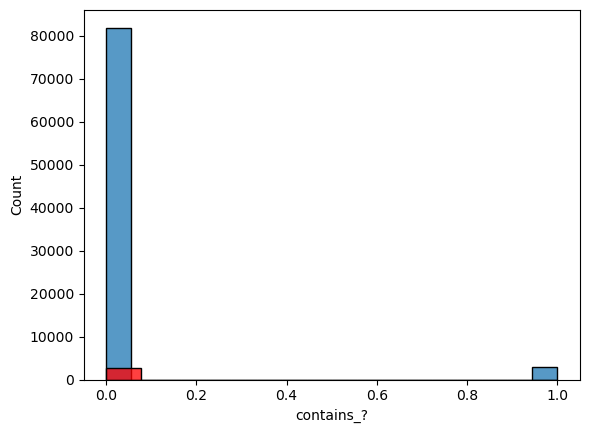

In [80]:
plt.figure()
sns.histplot(df[df['target'] == 0]['contains_?'])
sns.histplot(df[df['target'] == 1]['contains_?'],color='red')

<Axes: xlabel='contains_www', ylabel='Count'>

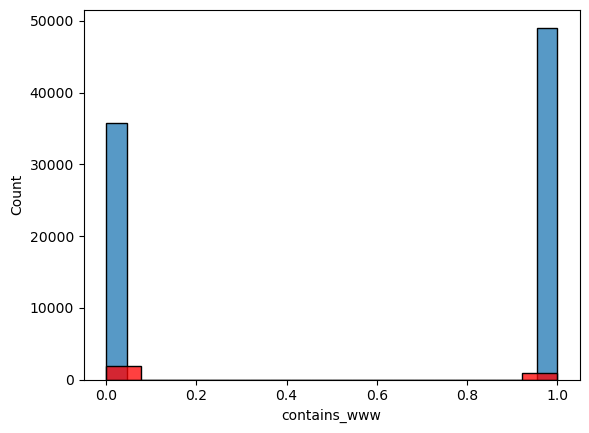

In [81]:
plt.figure()
sns.histplot(df[df['target'] == 0]['contains_www'])
sns.histplot(df[df['target'] == 1]['contains_www'],color='red')

/Users/mac/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


,target,url,len_url,contains_subscribe,contains_hash,num_digits,non_https,num_words,contains_?,contains_www
0,1,https://briefingday.us8.list-manage.com/unsubs...,51,1,0,1,1,4,0,0
1,1,https://www.hvper.com/,22,0,0,0,1,4,0,1
2,1,https://briefingday.com/m/v4n3i4f3,34,0,0,4,1,5,0,0
3,0,https://briefingday.com/n/20200618/m#commentform,48,0,1,8,1,6,0,0
4,1,https://briefingday.com/fan,27,0,0,0,1,4,0,0


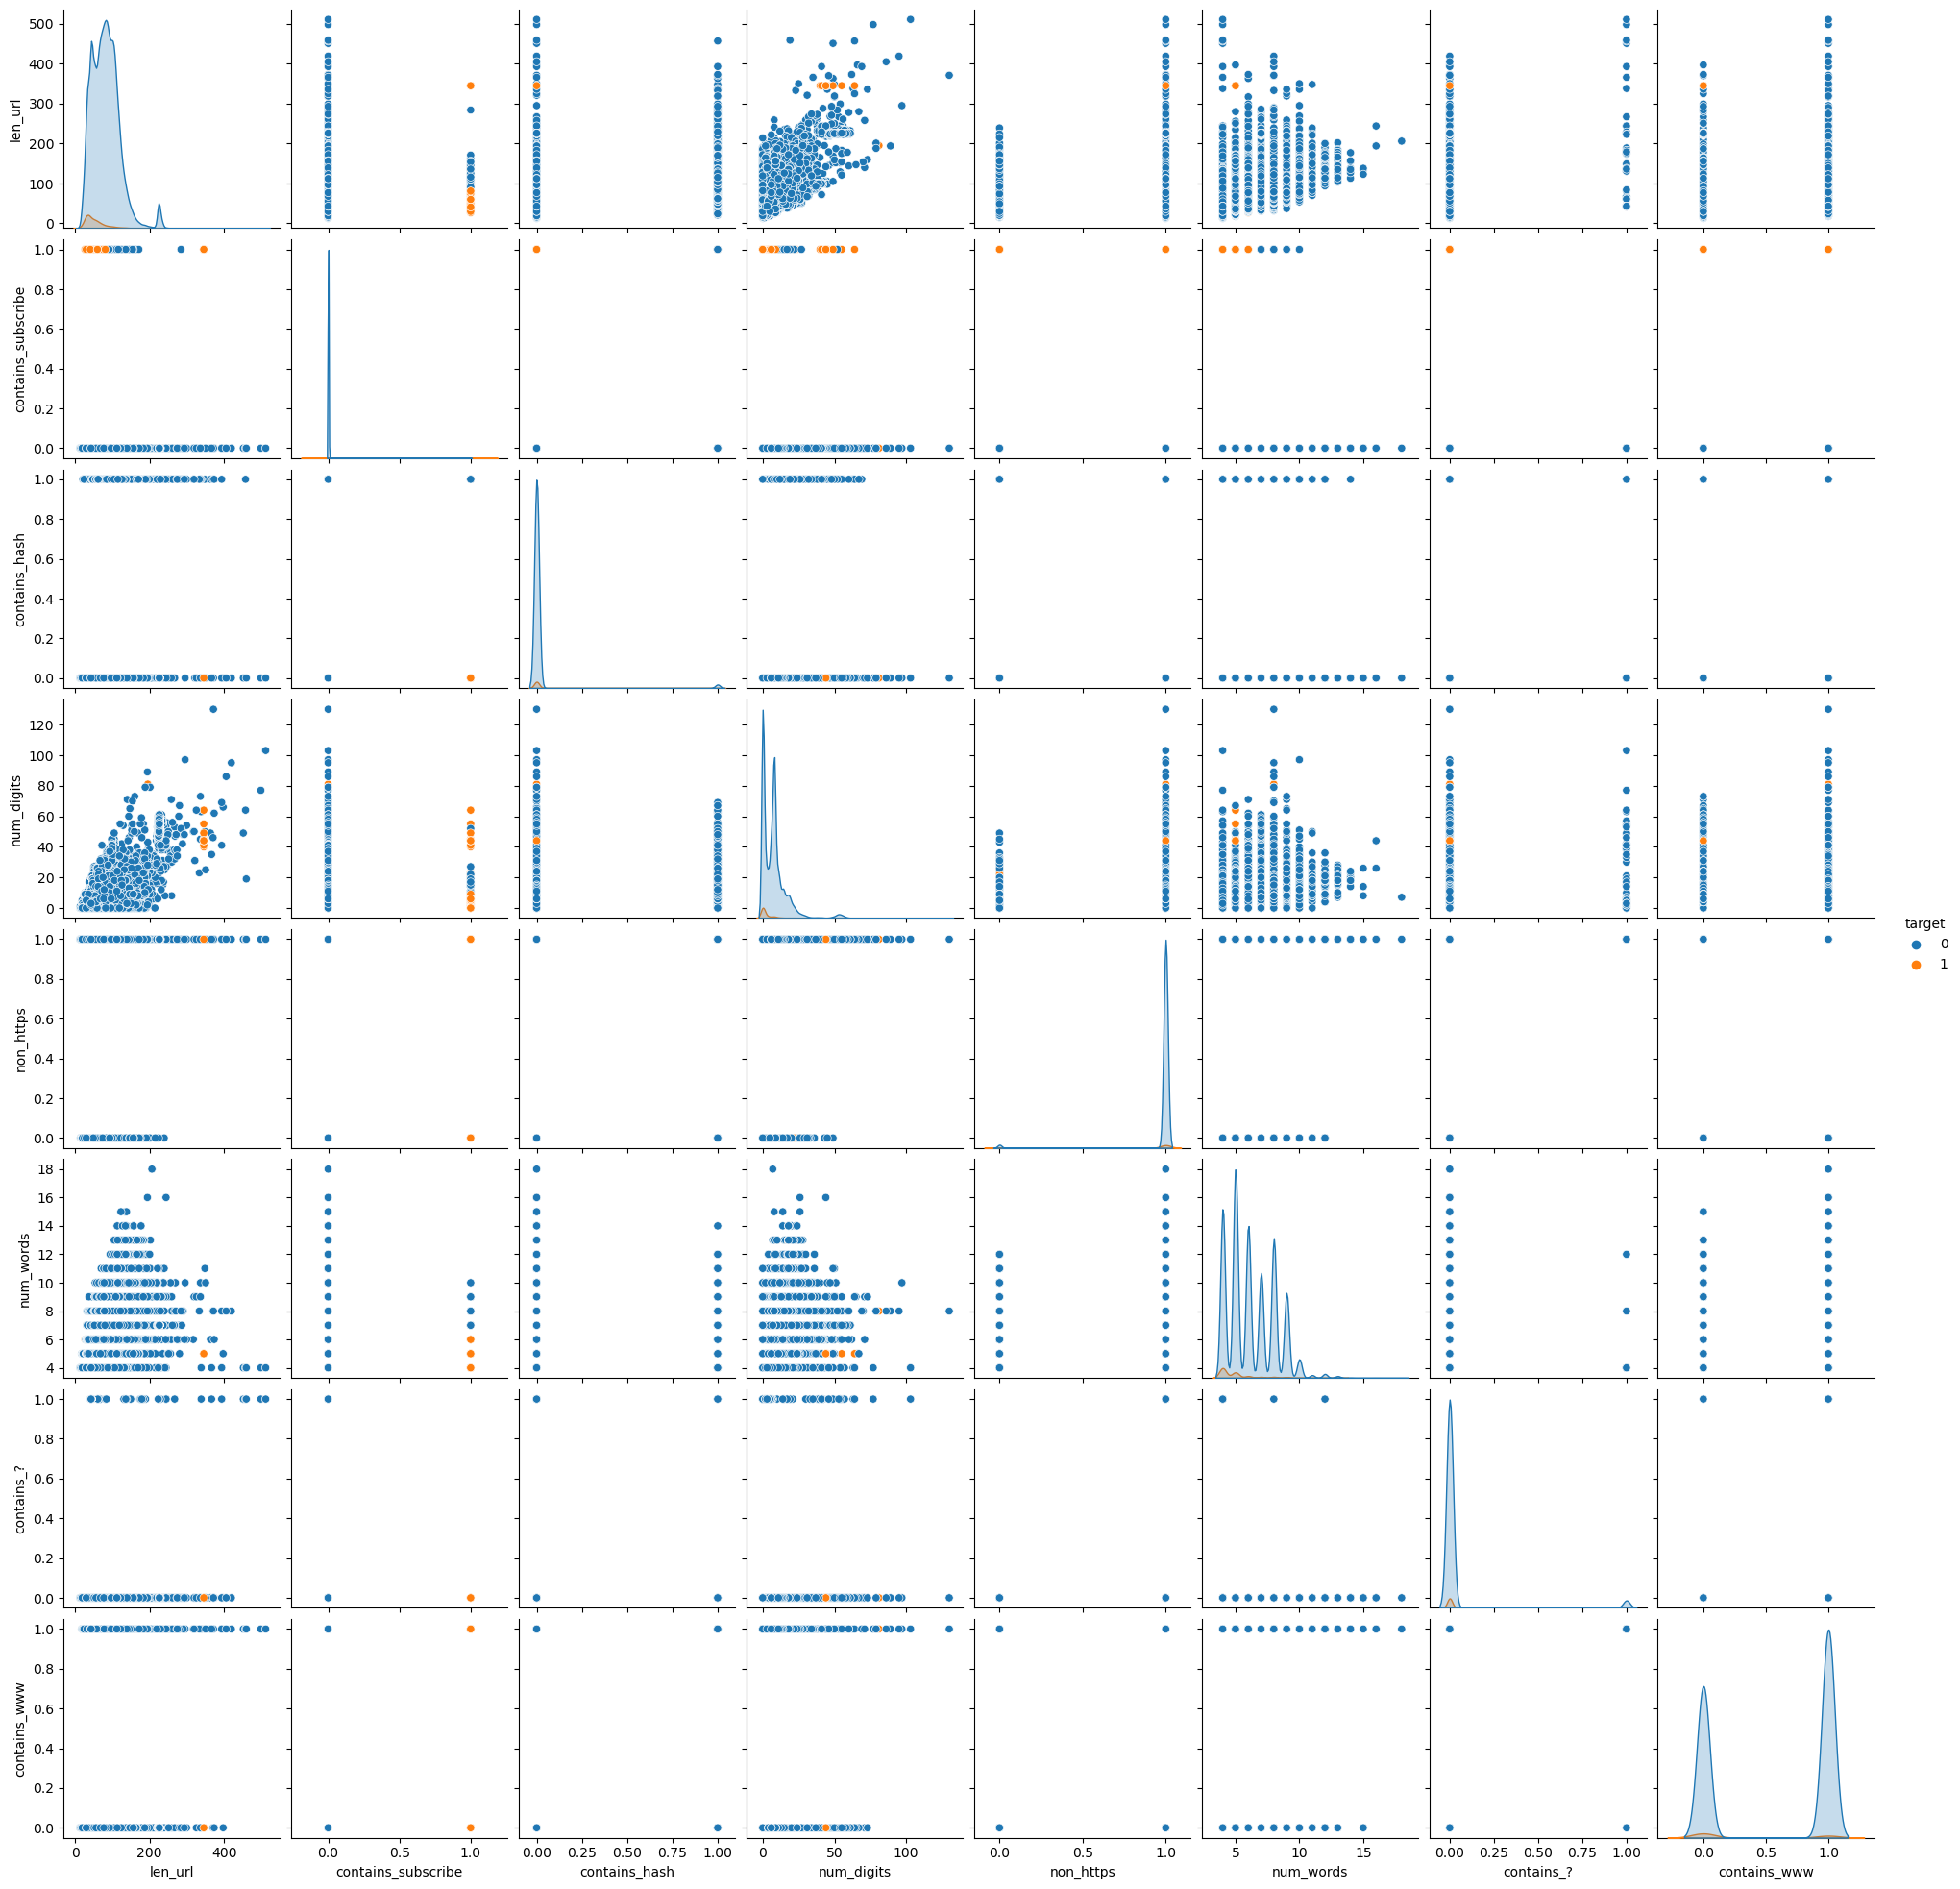

In [82]:
sns.pairplot(df,hue='target')
df.head()


<Axes: >

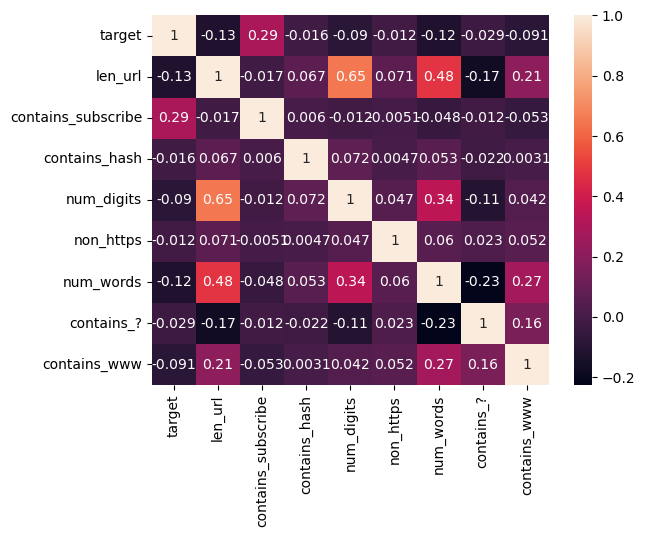

In [72]:
dfCorr = df[['target','len_url','contains_subscribe','contains_hash', 'num_digits', 'non_https', 'num_words', 'contains_?', 'contains_www']].corr()
sns.heatmap(dfCorr,annot=True)

## 4. Model Building

In [85]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [89]:
X = tfidf.fit_transform(df['url']).toarray()

In [292]:
#from sklearn.preprocessing import MinMaxScaler
#scaler = MinMaxScaler()
#X = scaler.fit_transform(X)

In [240]:
# appending the num_character col to X
#X = np.hstack((X,df['num_characters'].values.reshape(-1,1)))

In [90]:
X.shape

(87581, 3000)

In [91]:
y = df['target'].values

In [92]:
from sklearn.model_selection import train_test_split

In [93]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [94]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [95]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [96]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.6545070502940001
[[11011  5932]
 [  120   454]]
0.07109301597243971


In [97]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9727693098133242
[[16930    13]
 [  464   110]]
0.8943089430894309


In [98]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9100873437232403
[[15619  1324]
 [  251   323]]
0.19611414693381907


In [250]:
# tfidf --> MNB

In [99]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [100]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [101]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [102]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [103]:
train_classifier(svc,X_train,y_train,X_test,y_test)

(0.9680881429468516, 0.5301204819277109)

In [104]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.9680881429468516
Precision -  0.5301204819277109
For  KN
Accuracy -  0.9706570759833305
Precision -  0.6415094339622641
For  NB
Accuracy -  0.9727693098133242
Precision -  0.8943089430894309
For  DT
Accuracy -  0.9723696980076497
Precision -  0.9891304347826086
For  LR
Accuracy -  0.9740252326311583
Precision -  0.8993288590604027
For  RF
Accuracy -  0.9740252326311583
Precision -  0.8115183246073299
For  AdaBoost
Accuracy -  0.9735114460238625
Precision -  0.9296875


KeyboardInterrupt: 

In [105]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [107]:
performance_df

NameError: name 'performance_df' is not defined

In [108]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")

NameError: name 'performance_df' is not defined

In [109]:
performance_df1

NameError: name 'performance_df1' is not defined

/Users/mac/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


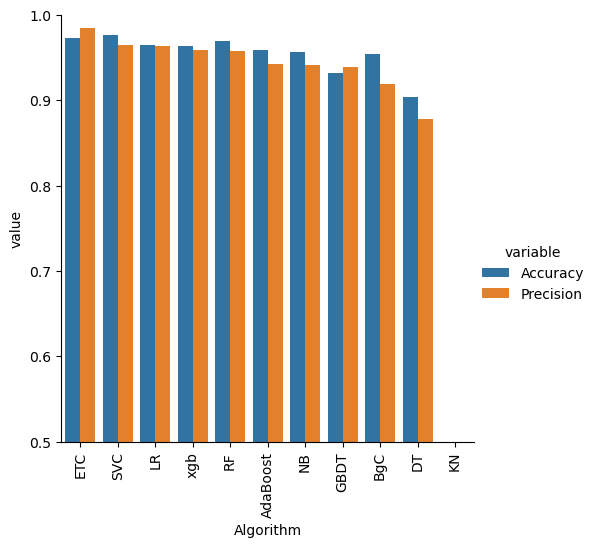

In [ ]:
sns.catplot(x = 'Algorithm', y='value', 
               hue = 'variable',data=performance_df1, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
# model improve
# 1. Change the max_features parameter of TfIdf

In [ ]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_max_ft_3000':accuracy_scores,'Precision_max_ft_3000':precision_scores}).sort_values('Precision_max_ft_3000',ascending=False)

In [ ]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_scaling':accuracy_scores,'Precision_scaling':precision_scores}).sort_values('Precision_scaling',ascending=False)

In [ ]:
new_df = performance_df.merge(temp_df,on='Algorithm')

In [ ]:
new_df_scaled = new_df.merge(temp_df,on='Algorithm')

In [ ]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_num_chars':accuracy_scores,'Precision_num_chars':precision_scores}).sort_values('Precision_num_chars',ascending=False)

In [ ]:
new_df_scaled.merge(temp_df,on='Algorithm')

,Algorithm,Accuracy,Precision,Accuracy_scaling_x,Precision_scaling_x,Accuracy_scaling_y,Precision_scaling_y,Accuracy_num_chars,Precision_num_chars
0,ETC,0.972616,0.985075,0.972616,0.985075,0.972616,0.985075,0.972616,0.985075
1,SVC,0.976393,0.964789,0.976393,0.964789,0.976393,0.964789,0.976393,0.964789
2,LR,0.965061,0.963235,0.965061,0.963235,0.965061,0.963235,0.965061,0.963235
3,xgb,0.963173,0.959559,0.963173,0.959559,0.963173,0.959559,0.963173,0.959559
4,RF,0.969783,0.957295,0.969783,0.957295,0.969783,0.957295,0.969783,0.957295
5,AdaBoost,0.958451,0.942238,0.958451,0.942238,0.958451,0.942238,0.958451,0.942238
6,NB,0.956563,0.941818,0.956563,0.941818,0.956563,0.941818,0.956563,0.941818
7,GBDT,0.932011,0.939271,0.932011,0.939271,0.932011,0.939271,0.932011,0.939271
8,BgC,0.953730,0.919580,0.953730,0.919580,0.953730,0.919580,0.953730,0.919580
9,DT,0.903683,0.878543,0.903683,0.878543,0.903683,0.878543,0.903683,0.878543


In [110]:
# Voting Classifier
svc = SVC(kernel='sigmoid', gamma=1.0,probability=True)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

from sklearn.ensemble import VotingClassifier

In [111]:
voting = VotingClassifier(estimators=[('svm', svc), ('nb', mnb), ('et', etc)],voting='soft')

In [112]:
voting.fit(X_train,y_train)

In [ ]:
y_pred = voting.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9811142587346553
Precision 0.9790209790209791


In [ ]:
# Applying stacking
estimators=[('svm', svc), ('nb', mnb), ('et', etc)]
final_estimator=RandomForestClassifier()

In [ ]:
from sklearn.ensemble import StackingClassifier



In [ ]:
clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator)

In [ ]:
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9820585457979226
Precision 0.9725085910652921


In [ ]:
import pickle
pickle.dump(tfidf,open('vectorizer-url.pkl','wb'))
pickle.dump(mnb,open('model-url.pkl','wb'))